**Project Title**

**Exploratory Data Analysis and Insights Generation for T-series YouTube Channel**

**Introduction**

**In this project, we will conduct a comprehensive exploratory data analysis (EDA) of the T-series YouTube channel dataset. The dataset contains information about various videos, including their video IDs, titles, descriptions, engagement metrics, publishing dates, and more. The goal of this project is to extract meaningful insights from the data that can help us understand the channel's content strategy, audience engagement, and trends over time.**

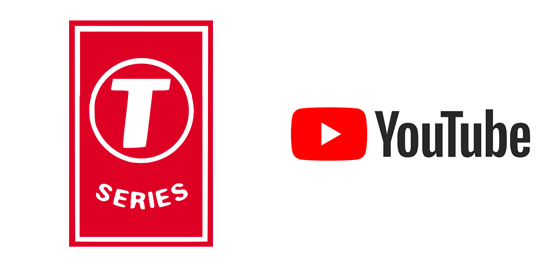

In [155]:
from IPython.display import Image, display
image_path = '/content/YT img.jpeg'
display(Image(filename=image_path))

# **Importing Data**

In [1]:
# importing required libraries

import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_excel("/content/drive/MyDrive/Datasets/YT_Tseries.xlsx")

In [4]:
df.head(2)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,0,F44TK5EHCRo,T-Series,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,"Presenting the song ""RAFTA RAFTA (Lo-Fi Mix)"" ...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T12:30:08Z,7299,241,0,59,PT4M42S,hd,False
1,1,adx8Rsjp-c0,T-Series,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...","Presenting the song ""TUM HO MERA PYAR (Lo-Fi M...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T10:30:01Z,4212,144,0,32,PT5M27S,hd,False


# **Data Exploration**

In [5]:
df.drop(columns = ["Unnamed: 0"] , inplace = True)

In [6]:
df.shape

(19345, 13)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

video_id         0
channelTitle     0
title            0
description      3
tags             0
publishedAt      0
viewCount        0
likeCount        0
favoriteCount    0
commentCount     0
duration         0
definition       0
caption          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       19345 non-null  object
 1   channelTitle   19345 non-null  object
 2   title          19345 non-null  object
 3   description    19342 non-null  object
 4   tags           19345 non-null  object
 5   publishedAt    19345 non-null  object
 6   viewCount      19345 non-null  int64 
 7   likeCount      19345 non-null  int64 
 8   favoriteCount  19345 non-null  int64 
 9   commentCount   19345 non-null  int64 
 10  duration       19345 non-null  object
 11  definition     19345 non-null  object
 12  caption        19345 non-null  bool  
dtypes: bool(1), int64(4), object(8)
memory usage: 1.8+ MB


In [10]:
# Extracting Required columns

df = df[["video_id","title","tags","publishedAt","viewCount","likeCount","commentCount","duration","definition"]]

In [11]:
df.head(2)

,video_id,title,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition
0,F44TK5EHCRo,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,"['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T12:30:08Z,7299,241,59,PT4M42S,hd
1,adx8Rsjp-c0,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T10:30:01Z,4212,144,32,PT5M27S,hd


# **Exploratory Data Analysis (EDA)**

In [12]:
# converting datatypes from object to datetiem for PublishedAT column

df["publishedAt"] = pd.to_datetime(df["publishedAt"])

<ipython-input-12-852be5e267a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["publishedAt"] = pd.to_datetime(df["publishedAt"])


In [13]:
# changing duration to duration in seconds

!pip install isodate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.1 MB/s eta 0:00:00


In [14]:
from isodate import parse_duration

df['duration'] = df['duration'].apply(lambda x: parse_duration(x))

df['duration'] = df['duration'].astype("timedelta64[s]")

In [15]:
# renaming duration to duration_seconds

df.rename(columns = { "duration" : "duration_seconds"} , inplace = True)

In [16]:
df[["title" , "duration_seconds"]].head(2)

,title,duration_seconds
0,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,282.0
1,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...",327.0


In [17]:
# Tags used in each videos

df["tag_count"] = df["tags"].apply(lambda x: len(x.split(', ')))

In [18]:
df[["tags","tag_count"]].head(2)

,tags,tag_count
0,"['hindi songs 2023', 'hindi songs new', 'bolly...",24
1,"['hindi songs 2023', 'hindi songs new', 'bolly...",23


In [26]:
# extracting date,year,time and month from publishedAt column

df["upload_date"] = df["publishedAt"].dt.date #date

df["upload_year"] = df["publishedAt"].dt.year  #year

df["upload_month"] = df["publishedAt"].dt.month_name()  #month

df["upload_day"] = df["publishedAt"].dt.day_name()  #weekday

df["upload_time"] = df["publishedAt"].dt.time   #time

In [29]:
df[["upload_year","upload_month","upload_day","upload_date","upload_time"]].sample(4)

,upload_year,upload_month,upload_day,upload_date,upload_time
18602,2011,May,Saturday,2011-05-14,05:48:22
9443,2017,March,Wednesday,2017-03-29,12:30:35
2178,2022,July,Friday,2022-07-15,14:30:07
16775,2011,May,Tuesday,2011-05-24,19:51:24


# **Q) Top 5 Most viewed Videos**

In [50]:
#top 5 videos as per view count

top_5 = df[["title","viewCount","upload_year","duration_seconds"]].sort_values("viewCount" , ascending = False).head(5)

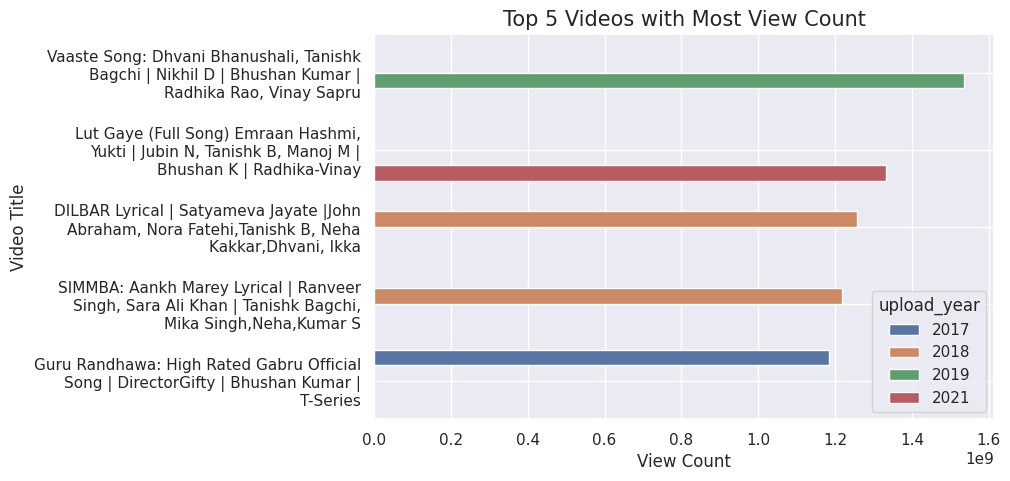

In [68]:
plt.figure(figsize = (8,5))

import textwrap
wrapped_titles = [textwrap.fill(title, width=40) for title in top_5["title"]]

sns.barplot(data = top_5 , y = wrapped_titles , x = "viewCount" , hue = "upload_year")

plt.title("Top 5 Videos with Most View Count", fontsize = 15)
plt.xlabel("View Count")
plt.ylabel("Video Title")

plt.grid()
plt.show()

# **Q) Top 5 most liked videos**

In [65]:
like_5 = df[["title", "likeCount", "upload_year", "duration_seconds"]].sort_values("likeCount" , ascending = False).head(5)

like_5

,title,likeCount,upload_year,duration_seconds
6649,"Vaaste Song: Dhvani Bhanushali, Tanishk Bagchi...",12840215,2019,267.0
4340,"Lut Gaye (Full Song) Emraan Hashmi, Yukti | Ju...",10724344,2021,298.0
5999,Full Song: KHAIRIYAT (BONUS TRACK) | CHHICHHOR...,7054035,2019,239.0
7677,Official Video: Humnava Mere Song | Jubin Naut...,6419042,2018,407.0
4396,"Saiyaan Ji ► Yo Yo Honey Singh, Neha Kakkar|Nu...",6387196,2021,220.0


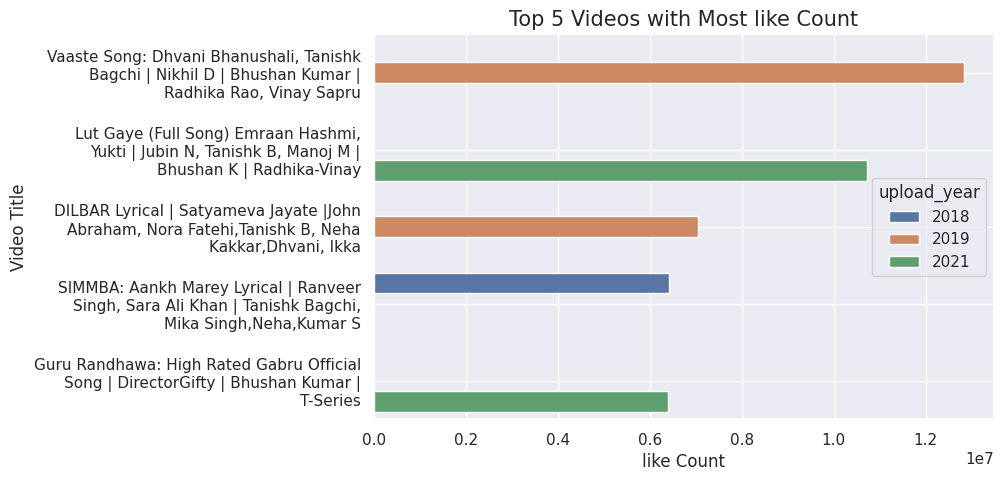

In [67]:
plt.figure(figsize = (8,5))

import textwrap
wrapped_titles = [textwrap.fill(title, width=40) for title in top_5["title"]]

sns.barplot(data = like_5 , y = wrapped_titles , x = "likeCount" , hue = "upload_year")

plt.title("Top 5 Videos with Most like Count", fontsize = 15)
plt.xlabel("like Count")
plt.ylabel("Video Title")

plt.grid()
plt.show()

# **Q) How Does Total View Count Vary Over Different Years?**

In [36]:
sns.set(style='dark')

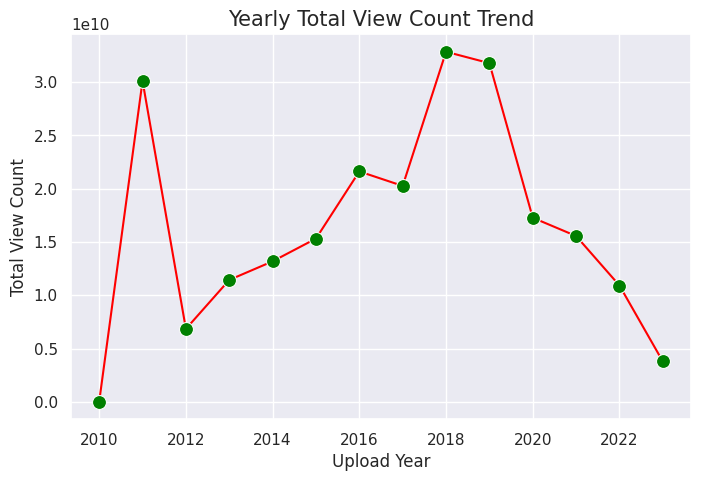

In [78]:
#plotting the line graph

plt.figure(figsize = (8,5))

sns.lineplot(data = yearly_view , x = "upload_year" , y = "viewCount" ,marker = "o" , color = "red" , markerfacecolor = "green" , markersize = 10)

plt.title("Yearly Total View Count Trend",fontsize = 15)
plt.xlabel("Upload Year")
plt.ylabel("Total View Count")

plt.grid()
plt.show()

# **Q) Number of videos uploaded on the YouTube channel changed over the years?**

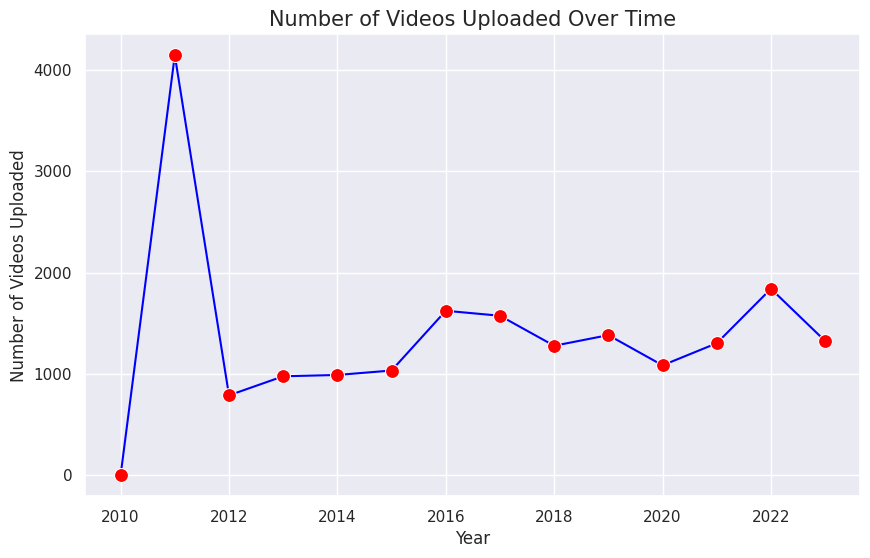

In [85]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df.groupby(df["upload_year"])["upload_month"].count(), marker="o", color="blue", markerfacecolor = "red" , markersize = 10)

plt.title("Number of Videos Uploaded Over Time", fontsize = 15)
plt.xlabel("Year")
plt.ylabel("Number of Videos Uploaded")

plt.grid()
plt.show()


# **Q) Extract the yearly trends of average view counts, average likes, and average comments for the videos**

In [71]:
year_metrics = df.groupby('upload_year').agg(
                number_of_videos=('publishedAt', 'size'),
                avg_view=('viewCount', 'mean'),
                avg_like=('likeCount', 'mean'),
                avg_comment=('commentCount', 'mean')
                ).reset_index()

year_metrics.head(2)

,upload_year,number_of_videos,avg_view,avg_like,avg_comment
0,2010,1,1.662209e+06,29257.000000,73.000000
1,2011,4143,7.268617e+06,34982.542843,972.651702


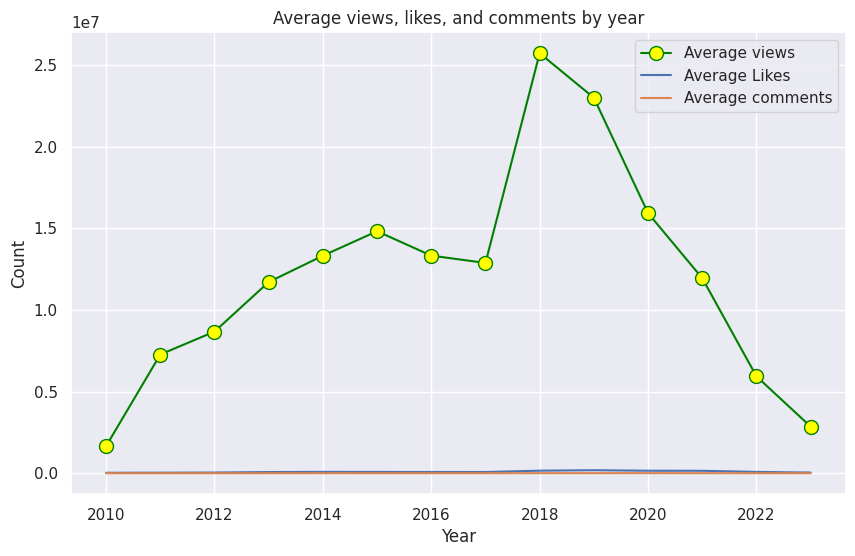

In [88]:
plt.figure(figsize=(10,6))

plt.plot(year_metrics["upload_year"] , year_metrics["avg_view"]  , label = "Average views" , marker = "o" ,color ="green", markerfacecolor = "yellow", markersize = 10 )
plt.plot(year_metrics["upload_year"] , year_metrics["avg_like"], label = "Average Likes")
plt.plot(year_metrics["upload_year"] , year_metrics["avg_comment"], label = "Average comments")

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Average views, likes, and comments by year')

plt.legend()
plt.grid()

plt.show()

# **Q) When are the Majority of Videos Uploaded?**

In [90]:

def upload_timings(upload_time):
    if 5 <= upload_time.hour < 12:
        return 'Morning'
    elif 12 <= upload_time.hour < 17:
        return 'Afternoon'
    elif 17 <= upload_time.hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_slot'] = df['upload_time'].apply(upload_timings)

In [91]:
time_slot_counts = df['time_slot'].value_counts()
time_slot_counts

Morning      10872
Afternoon     6101
Night         1684
Evening        688
Name: time_slot, dtype: int64

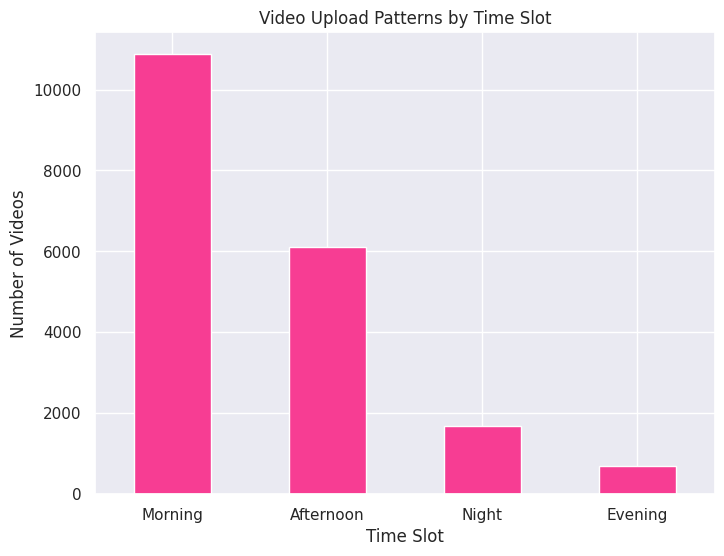

In [93]:
plt.figure(figsize=(8, 6))

time_slot_counts.plot(kind='bar', color='#F73D93')

plt.xlabel('Time Slot')
plt.ylabel('Number of Videos')
plt.title('Video Upload Patterns by Time Slot')
plt.xticks(rotation=0)

plt.grid()
plt.show()

# **Q) How many videos were uploaded on each day of the week?**

In [99]:
day_counts = df['upload_day'].value_counts()

day_counts

Monday       3729
Tuesday      3184
Friday       3176
Wednesday    2829
Thursday     2673
Saturday     2487
Sunday       1267
Name: upload_day, dtype: int64

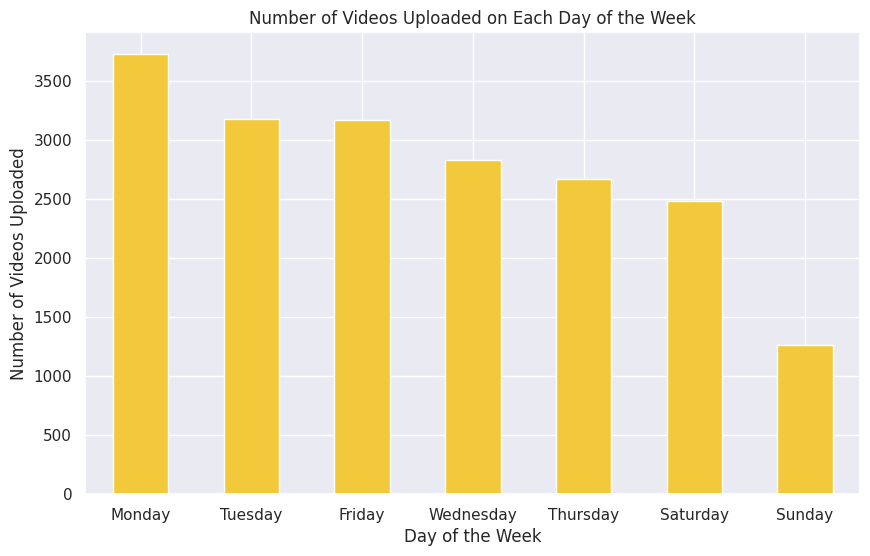

In [100]:
plt.figure(figsize=(10, 6))

day_counts.plot(kind='bar', color='#F1C93B')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos Uploaded')
plt.title('Number of Videos Uploaded on Each Day of the Week')
plt.xticks(rotation=0)

plt.grid()
# Show the plot
plt.show()

# **Q) Relationship between the number of tags and average view count?**

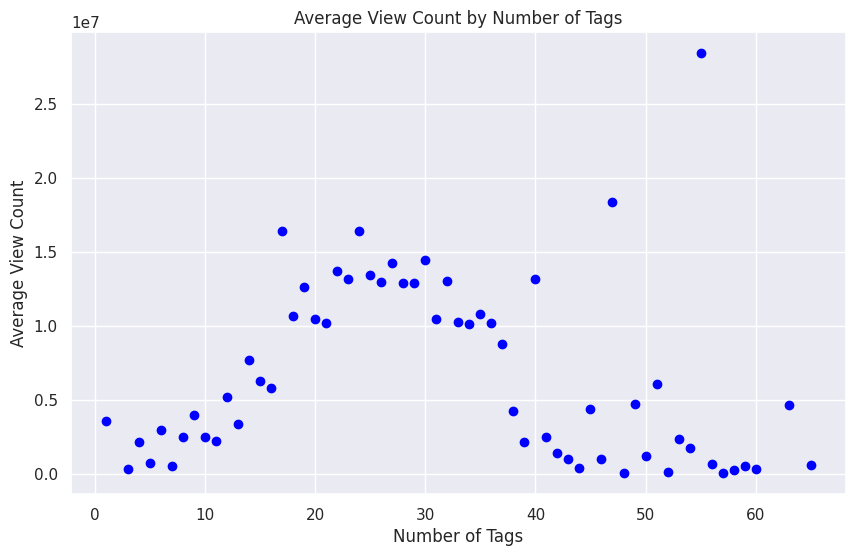

In [96]:
avg_view_by_tags = df.groupby('tag_count')['viewCount'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(avg_view_by_tags['tag_count'], avg_view_by_tags['viewCount'], color='blue')

plt.title('Average View Count by Number of Tags')
plt.xlabel('Number of Tags')
plt.ylabel('Average View Count')


plt.grid()
plt.show()

# **Q) What is the Most Frequent Word Used in Titles?**

In [103]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

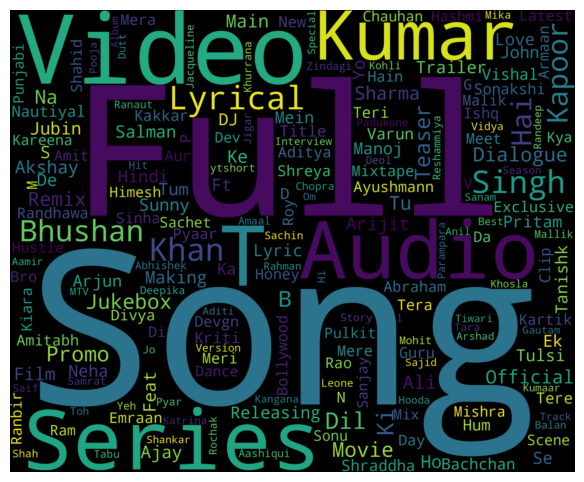

In [106]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Removing stopwords from titles
stop_words = set(stopwords.words("english"))
df["title_no_stopwords"] = df["title"].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Combining all titles into a single string
all_words_str = ' '.join(df["title_no_stopwords"].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=2200, height=1800, random_state=1, collocations=False).generate(all_words_str)

# Define a function to plot the word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_cloud(wordcloud)

# **Q) How many Short Videos are uploaded?**

In [113]:
from datetime import date

In [151]:
short_videos = df[ (df["upload_date"] > date(2020,9,1)) & (df['duration_seconds'] <= 60.0) ]

short_videos.shape

(942, 17)

In [117]:
# extracting required columns

short_videos = short_videos[["title","viewCount","likeCount","duration_seconds","upload_year","upload_month","upload_time"]]

short_videos.head(2)

,title,viewCount,likeCount,duration_seconds,upload_year,upload_month,upload_time
6,Kaatil Ada 😎 | Yaariyan 2 | #MeezaanJafri #Di...,93558,2113,12.0,2023,August,12:30:03
8,Divya & Yash 😍 | Yaariyan 2 | #DivyaKhoslaKuma...,67312,2461,16.0,2023,August,08:30:00


# **1. Most Viewed short videos ?**

In [120]:
top5 = short_videos[["title","viewCount","upload_year"]].sort_values("viewCount" , ascending = False).head(5)

top5

,title,viewCount,upload_year
1841,Create your #ManikeMove only on YouTube Shorts...,65046055,2022
3411,Kusu Kusu with Nora Fatehi #KusuKusuChallenge ...,46493566,2021
1205,#Heartbroken 💔 Aisi Khuda Dua De De ▶ #Jaani ✍...,39180773,2023
3120,Oo Bolega🔥🔥| #Samantha #AlluArjun#Pushpa 😍💃🏻| ...,38143960,2022
393,ANIMAL Pre-Teaser | Ranbir Kapoor | Sandeep Re...,30820704,2023


In [125]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, message="Glyph .* missing from current font")

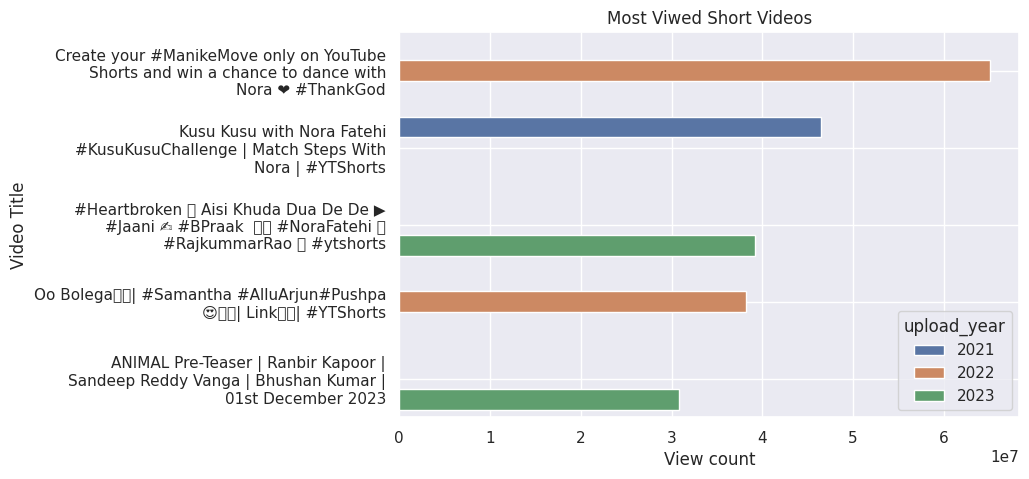

In [126]:
plt.figure(figsize =(8,5))

wrapped_titles = [textwrap.fill(title, width=40) for title in top5["title"]]

sns.barplot(data = top5 , x = "viewCount", y = wrapped_titles , hue = "upload_year")

plt.title("Most Viwed Short Videos")
plt.xlabel("View count")
plt.ylabel("Video Title")

plt.grid()
plt.show()

# **2. Most liked Short videos?**

In [129]:
like5 = short_videos[["title","likeCount","upload_year"]].sort_values("likeCount" , ascending = False).head(5)

like5

,title,likeCount,upload_year
1841,Create your #ManikeMove only on YouTube Shorts...,3398624,2022
1205,#Heartbroken 💔 Aisi Khuda Dua De De ▶ #Jaani ✍...,1705040,2023
3411,Kusu Kusu with Nora Fatehi #KusuKusuChallenge ...,1612244,2021
3120,Oo Bolega🔥🔥| #Samantha #AlluArjun#Pushpa 😍💃🏻| ...,1153897,2022
2682,"Bhool Bhulaiyaa 2 (Teaser) Kartik A, Kiara A, ...",868193,2022


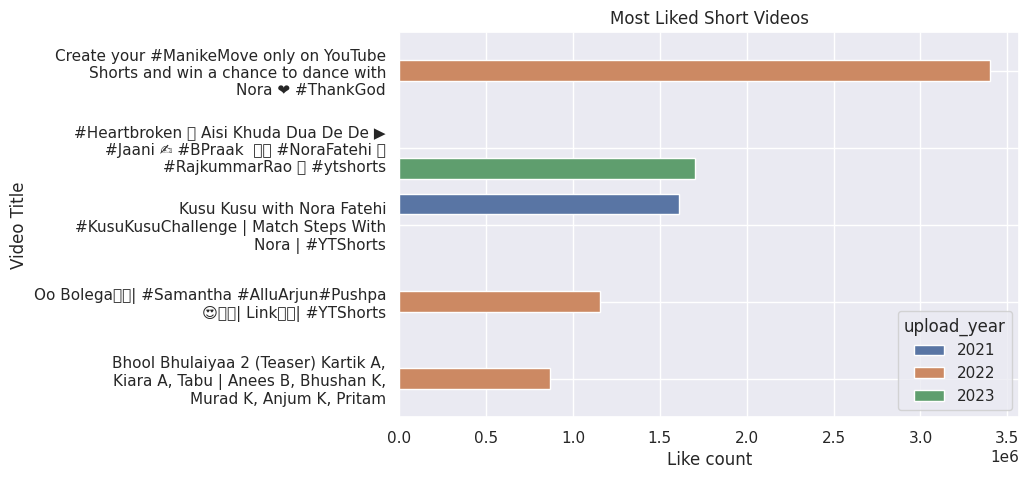

In [132]:
plt.figure(figsize =(8,5))

wrapped_titles = [textwrap.fill(title, width=40) for title in like5["title"]]

sns.barplot(data = like5 , x = "likeCount", y = wrapped_titles , hue = "upload_year")

plt.title("Most Liked Short Videos")
plt.xlabel("Like count")
plt.ylabel("Video Title")

plt.grid()
plt.show()

# **3. Number of Shorts uploaded on yearly basis ?**

In [138]:
temp_df = short_videos.groupby("upload_year")["title"].count()

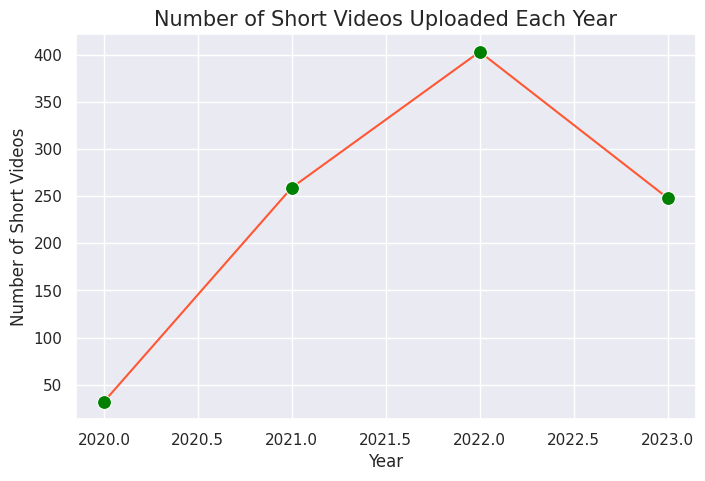

In [147]:
plt.figure(figsize=(8, 5))

sns.lineplot(x=temp_df.index, y=temp_df.values, color="#FF5733" , marker = "o" , markerfacecolor = "green" ,markersize = 10 )

plt.title("Number of Short Videos Uploaded Each Year", fontsize = 15)
plt.xlabel("Year")
plt.ylabel("Number of Short Videos")

plt.grid()
plt.show()

# 4. **Video Durations for Short Videos?**

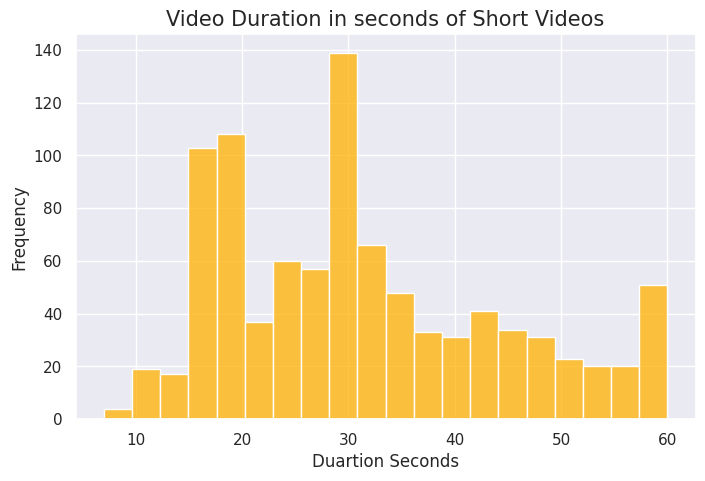

In [150]:
# using histogram with kde plot

plt.figure(figsize=(8, 5))

sns.histplot(data=short_videos, x='duration_seconds', bins=20 , color = "#FFB100")

plt.title("Video Duration in seconds of Short Videos", fontsize = 15)
plt.xlabel("Duartion Seconds")
plt.ylabel("Frequency")

plt.grid()
plt.show()

# **5. Corelation between likes and views?**

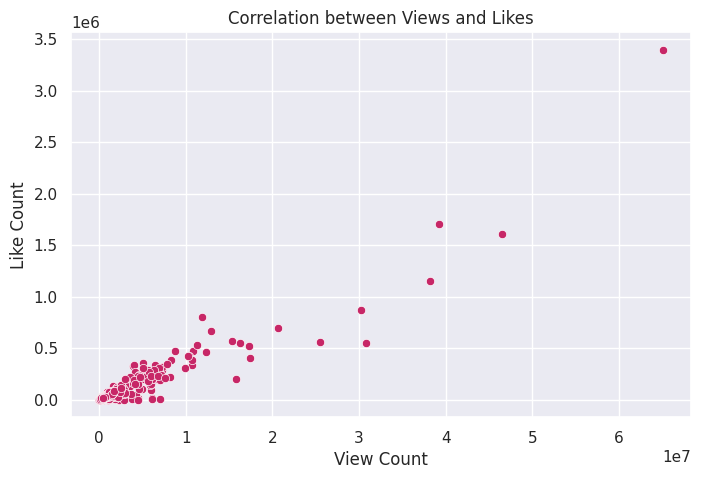

In [153]:
plt.figure(figsize=(8, 5))

sns.scatterplot(x=short_videos["viewCount"], y=short_videos["likeCount"] , color = "#C72767")

# Adding axis labels and a title
plt.title('Correlation between Views and Likes')
plt.xlabel('View Count')
plt.ylabel('Like Count')

plt.grid()
plt.show()

In [154]:
# Calculate the correlation coefficient

short_videos['viewCount'].corr(short_videos['likeCount'])

0.9441090921897759

# **Conclusion:**

**This project aims to provide a comprehensive analysis of the T-series YouTube channel dataset, helping to uncover valuable insights that can guide content creation and optimization strategies. By understanding audience preferences, engagement patterns, and trends, the T-series team can make informed decisions to enhance their channel's performance and reach.**